### Problem Statement

Calculate GPA



# Adrian Pineda Sanchez A00834710


# CONSERVAREMOS LO ORIGINAL DEL CODIGO ANTERIOR HASTA EL PUNTO 6, INCLUSO LAS COLUMAS DE GRADE CLASS Y PROFILE PARA VER EL DESEMPENO DEL MODELO

### 1) Import Libraries

First let's import the following libraries, if there is any library that you need and is not in the list bellow feel free to include it

In [ ]:
import numpy as np☺
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import seaborn as sns


### 2) Load Data

- You will use the same file from the previous activity (Student Performance Data)

In [2]:
data = pd.read_csv("C:/Users/adria/Downloads/Student_performance_data.csv")
data

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,3388,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0
2388,3389,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0
2389,3390,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0
2390,3391,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


### 3) Add a new column called 'Profile' this column will have the following information

Based on the value of GPA for each student: 

- If GPA values between 0 and 2 will be labeled 'Low', 
- Values between 2 and 3.5 will be 'Medium', 
- And values between 3.5 and 5 will be 'High'.


In [4]:
# Add the 'Profile' column based on GPA
data['Profile'] = pd.cut(data['GPA'], 
                          bins=[-1, 2, 3.5, 5], 
                          labels=['Low', 'Medium', 'High'])

# Display the updated DataFrame
data.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass,Profile
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0,Medium
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0,Medium
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0,Low
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0,Medium
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0,Low


### 4) Use Matplotlib to show a Pie chart to show the percentage of students in each profile.
- Title: Students distribution of Profiles
- Graph Type: pie

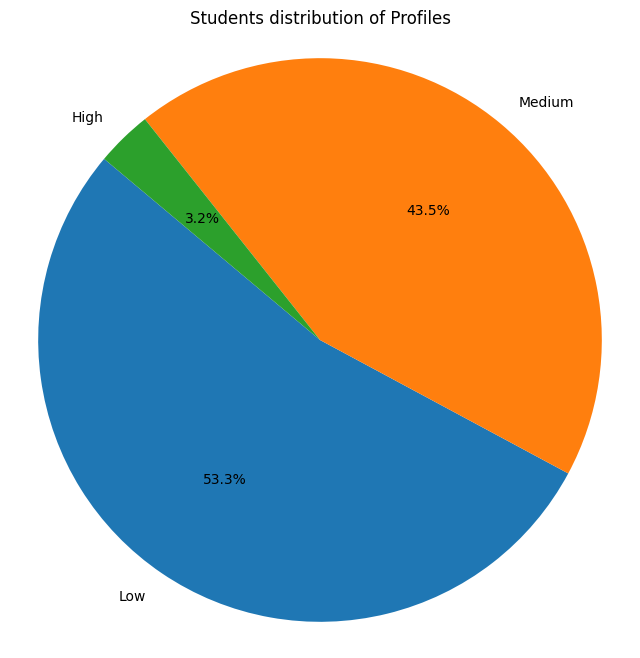

In [5]:
# Create a pie chart
profile_counts = data['Profile'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(profile_counts, labels=profile_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Students distribution of Profiles')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### 5) Convert the Profile column into a Categorical Int

You have already created a column with three different values: 'Low', 'Medium', 'High'. These are Categorical values. But, it is important to notice that Neural Networks works better with numbers, since we apply mathematical operations to them.

Next you need to convert Profile values from Low, Medium and High, to 0, 1 and 2. IMPORTANT, the order does not matter, but make sure you always assign the same number to Low, same number to Medium and same number to High.

Make sure to use the fit_transform method from LabelEncoder.

In [6]:
# Initialize the LabelEncoder
le = LabelEncoder()

# Fit and transform the Profile column
data['Profile'] = le.fit_transform(data['Profile'])

# Display the first few rows to check
data[['StudentID', 'Profile']].head()


,StudentID,Profile
0,1001,2
1,1002,2
2,1003,1
3,1004,2
4,1005,1


# Modulo 2 - 8. Dense + Dropout + Batch Normalization

### 6) Select the columns for your model.

Same as the last excersice we need a dataset for features and a dataset for label.

- Create the following dataset:
   - A dataset with the columns for the model.
   - From that data set generate the 'X' dataset. This dataset will have all the features (make sure Profile is NOT in this dataset)
   - Generate a second 'y' dataset, This dataset will only have our label column, which is 'Profile'.
   - Generate the Train and Test datasets for each X and y:
      - X_train with 80% of the data
      - X_test with 20% of the data
      - y_train with 80% of the data
      - y_test with 20% of the data

In [7]:
# Ensure 'Profile' is already encoded as integers
# Create the X dataset (excluding 'Profile')
X = data.drop(columns=['GPA','StudentID',])

# Create the y dataset (only 'Profile')
y = data['GPA']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Check the shapes of the datasets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (1913, 14)
X_test shape: (479, 14)
y_train shape: (1913,)
y_test shape: (479,)


### 7) All Feature datasets in the same scale.

Use StandardScaler to make sure all features in the X_train and X_test datasets are on the same scale.


Standardization transforms your data so that it has a mean of 0 and a standard deviation of 1. This is important because many machine learning algorithms perform better when the input features are on a similar scale.

Reason for Using StandardScaler:
- Consistent Scale: Features with different scales (e.g., age in years, income in dollars) can bias the model. StandardScaler ensures all features contribute equally.
- Improved Convergence: Algorithms like gradient descent converge faster with standardized data.
- Regularization: Helps in achieving better performance in regularization methods like Ridge and Lasso regression.


In [8]:
# Initialize StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Optionally, convert the scaled arrays back to DataFrames
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Check the shapes of the scaled datasets
print(f"X_train_scaled shape: {X_train_scaled.shape}")
print(f"X_test_scaled shape: {X_test_scaled.shape}")


X_train_scaled shape: (1913, 14)
X_test_scaled shape: (479, 14)


# Experiment 1: A single Dense Hidden Layer

### 8. Define your Deep Neural Network.

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Definir la red neuronal con una capa oculta densa
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))  # Hidden Layer
model.add(Dense(1))  # Output Layer for regression


c:\Users\adria\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### 9. Compile your Neural Network

In [10]:
# Compilar el modelo
model.compile(optimizer='adam', loss='mse', metrics=['mse'])


### 10. Fit (or train) your model

In [11]:
# Entrenar el modelo
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32, verbose=1)

Epoch 1/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 23.5542 - mse: 23.5542 - val_loss: 1.6118 - val_mse: 1.6118
Epoch 2/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9182 - mse: 0.9182 - val_loss: 0.3222 - val_mse: 0.3222
Epoch 3/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2808 - mse: 0.2808 - val_loss: 0.2214 - val_mse: 0.2214
Epoch 4/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1904 - mse: 0.1904 - val_loss: 0.1456 - val_mse: 0.1456
Epoch 5/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1332 - mse: 0.1332 - val_loss: 0.1133 - val_mse: 0.1133
Epoch 6/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1087 - mse: 0.1087 - val_loss: 0.1031 - val_mse: 0.1031
Epoch 7/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0979 - mse: 0.0979 - val_loss: 0.0906 - val_mse: 0.0906
Epoch 8/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0832 - mse: 0.0832 - val_loss: 0.0807 - val_mse: 0.0807
Epoch 9/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0

### 11. View your history variable:

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 958us/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 853us/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 802us/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 932us/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 949us/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 905us/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 973us/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 903us/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 912us/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 920us/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 823us/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 883us/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 890us/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 923us/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 935us/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 921us/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
15/15 ━━━━━━━━━━━━━━━━━━

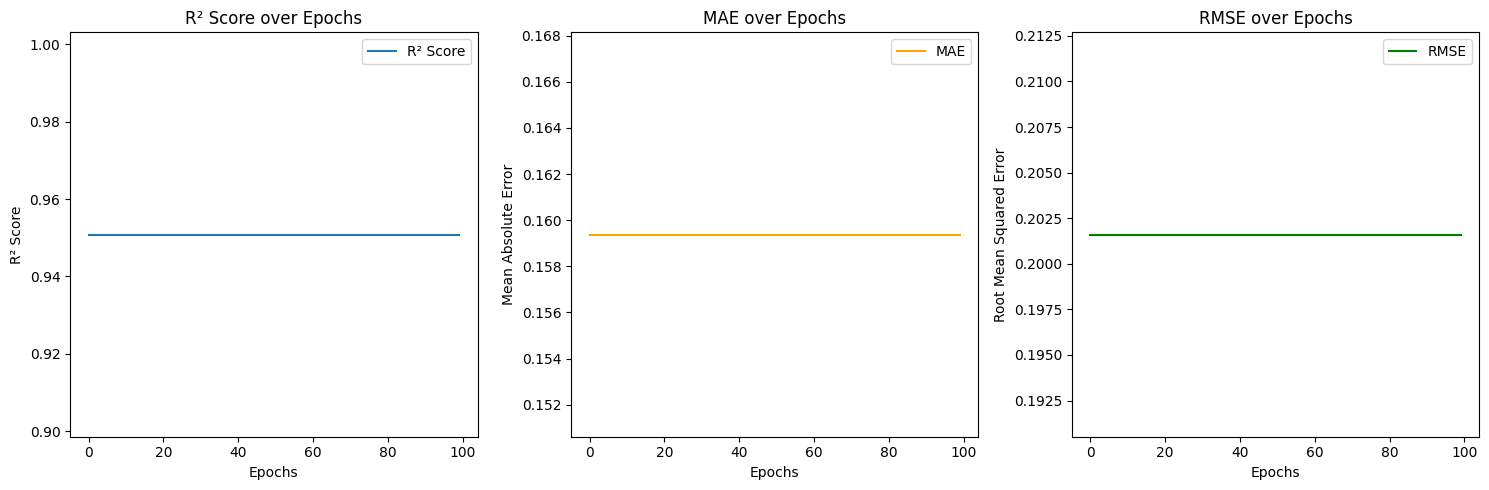

In [12]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Inicializar listas para almacenar las métricas por epoch
r2_scores = []
mae_scores = []
rmse_scores = []

# Calcular métricas para cada epoch usando el conjunto de validación
for i in range(len(history.history['val_loss'])):
    y_val_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_val_pred)
    mae = mean_absolute_error(y_test, y_val_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_val_pred))
    
    r2_scores.append(r2)
    mae_scores.append(mae)
    rmse_scores.append(rmse)

# Graficar las métricas
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(r2_scores, label='R² Score')
plt.title('R² Score over Epochs')
plt.xlabel('Epochs')
plt.ylabel('R² Score')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(mae_scores, label='MAE', color='orange')
plt.title('MAE over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(rmse_scores, label='RMSE', color='green')
plt.title('RMSE over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Root Mean Squared Error')
plt.legend()

plt.tight_layout()
plt.show()


### 12. Evaluate your model:

In [13]:
# Predicciones en el conjunto de entrenamiento
y_pred_train_exp1 = model.predict(X_train).flatten()

# Calcular métricas en el conjunto de entrenamiento
evaluation_metrics_train_exp1 = pd.DataFrame({
    'Metric': ['MSE', 'RMSE', 'MAE', 'R²'],
    'Value (Train)': [
        mean_squared_error(y_train, y_pred_train_exp1),
        np.sqrt(mean_squared_error(y_train, y_pred_train_exp1)),
        mean_absolute_error(y_train, y_pred_train_exp1),
        r2_score(y_train, y_pred_train_exp1)
    ]
})

# Predicciones en el conjunto de prueba
y_pred_test_exp1 = model.predict(X_test).flatten()

# Calcular métricas en el conjunto de prueba
evaluation_metrics_test_exp1 = pd.DataFrame({
    'Metric': ['MSE', 'RMSE', 'MAE', 'R²'],
    'Value (Test)': [
        mean_squared_error(y_test, y_pred_test_exp1),
        np.sqrt(mean_squared_error(y_test, y_pred_test_exp1)),
        mean_absolute_error(y_test, y_pred_test_exp1),
        r2_score(y_test, y_pred_test_exp1)
    ]
})

# Combinar métricas de entrenamiento y prueba
combined_evaluation_exp1 = pd.merge(evaluation_metrics_train_exp1, evaluation_metrics_test_exp1, on='Metric')
print("Experiment 1 - Single Dense Layer")
combined_evaluation_exp1

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 836us/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Experiment 1 - Single Dense Layer


,Metric,Value (Train),Value (Test)
0,MSE,0.034185,0.040645
1,RMSE,0.184892,0.201606
2,MAE,0.145616,0.159378
3,R²,0.959284,0.950849


### 13. Use your model to make some predictions:

In [14]:
# Tomar los primeros 10 estudiantes del conjunto de prueba
X_sample = X_test[:10]
y_sample_real = y_test[:10]

# Realizar predicciones para estos 10 estudiantes
y_sample_pred = model.predict(X_sample).flatten()

# Crear un DataFrame para comparar las etiquetas reales y las predicciones
comparison_df = pd.DataFrame({
    'Student Index': y_sample_real.index,
    'Real GPA': y_sample_real.values,
    'Predicted GPA': y_sample_pred
})

# Mostrar el resultado
comparison_df




1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


,Student Index,Real GPA,Predicted GPA
0,1004,1.427724,1.419042
1,196,3.117354,2.891087
2,2342,2.037769,1.880139
3,1708,3.548521,3.654350
4,435,0.248977,0.417582
5,321,2.627694,2.548500
6,1472,2.057379,1.790390
7,1703,2.248338,2.429131
8,900,2.194707,2.179583
9,1057,0.758183,1.070900


## Experiment 2: A set of three Dense Hidden Layers

### 8. Define your Deep Neural Network.

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Modelo con tres capas densas ocultas
model_exp2 = Sequential()
model_exp2.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))  # Primera capa oculta
model_exp2.add(Dense(32, activation='relu'))  # Segunda capa oculta
model_exp2.add(Dense(32, activation='relu'))  # Tercera capa oculta
model_exp2.add(Dense(1))  # Capa de salida


c:\Users\adria\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### 9. Compile your Neural Network

In [16]:
model_exp2.compile(optimizer='adam', loss='mse', metrics=['mse'])


### 10. Fit (or train) your model

In [17]:
history_exp2 = model_exp2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64, verbose=1)


Epoch 1/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 2.0332 - mse: 2.0332 - val_loss: 0.2268 - val_mse: 0.2268
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2069 - mse: 0.2069 - val_loss: 0.1340 - val_mse: 0.1340
Epoch 3/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1319 - mse: 0.1319 - val_loss: 0.1070 - val_mse: 0.1070
Epoch 4/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0945 - mse: 0.0945 - val_loss: 0.0956 - val_mse: 0.0956
Epoch 5/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0944 - mse: 0.0944 - val_loss: 0.0889 - val_mse: 0.0889
Epoch 6/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0858 - mse: 0.0858 - val_loss: 0.0889 - val_mse: 0.0889
Epoch 7/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0796 - mse: 0.0796 - val_loss: 0.0791 - val_mse: 0.0791
Epoch 8/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0715 - mse: 0.0715 - val_loss: 0.0792 - val_mse: 0.0792
Epoch 9/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.073

### 11. View your history variable:

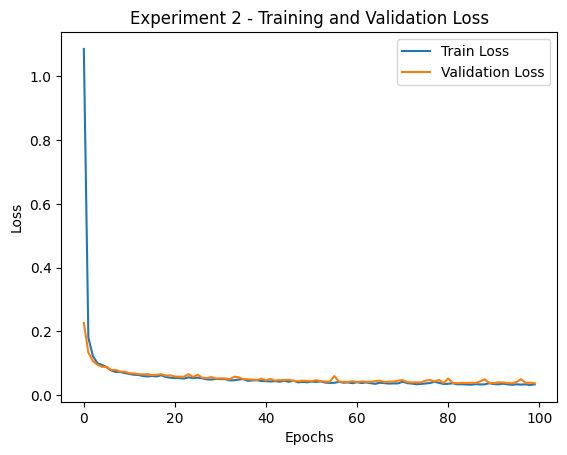

In [18]:
plt.plot(history_exp2.history['loss'], label='Train Loss')
plt.plot(history_exp2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Experiment 2 - Training and Validation Loss')
plt.legend()
plt.show()


### 12. Evaluate your model:

In [19]:
# Predicciones en el conjunto de entrenamiento
y_pred_train_exp2 = model_exp2.predict(X_train).flatten()

# Calcular métricas en el conjunto de entrenamiento
evaluation_metrics_train_exp2 = pd.DataFrame({
    'Metric': ['MSE', 'RMSE', 'MAE', 'R²'],
    'Value (Train)': [
        mean_squared_error(y_train, y_pred_train_exp2),
        np.sqrt(mean_squared_error(y_train, y_pred_train_exp2)),
        mean_absolute_error(y_train, y_pred_train_exp2),
        r2_score(y_train, y_pred_train_exp2)
    ]
})

# Predicciones en el conjunto de prueba
y_pred_test_exp2 = model_exp2.predict(X_test).flatten()

# Calcular métricas en el conjunto de prueba
evaluation_metrics_test_exp2 = pd.DataFrame({
    'Metric': ['MSE', 'RMSE', 'MAE', 'R²'],
    'Value (Test)': [
        mean_squared_error(y_test, y_pred_test_exp2),
        np.sqrt(mean_squared_error(y_test, y_pred_test_exp2)),
        mean_absolute_error(y_test, y_pred_test_exp2),
        r2_score(y_test, y_pred_test_exp2)
    ]
})

# Combinar métricas de entrenamiento y prueba
combined_evaluation_exp2 = pd.merge(evaluation_metrics_train_exp2, evaluation_metrics_test_exp2, on='Metric')
print("Experiment 2 - Three Dense Hidden Layers")
combined_evaluation_exp2


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Experiment 2 - Three Dense Hidden Layers


,Metric,Value (Train),Value (Test)
0,MSE,0.031685,0.037435
1,RMSE,0.178003,0.193482
2,MAE,0.141171,0.153845
3,R²,0.962261,0.954730


### 13. Use your model to make some predictions:

In [20]:
# Tomar los primeros 10 estudiantes del conjunto de prueba
X_sample = X_test[:10]
y_sample_real = y_test[:10]

# Realizar predicciones para estos 10 estudiantes
y_sample_pred = model_exp2.predict(X_sample).flatten()

# Crear un DataFrame para comparar las etiquetas reales y las predicciones
comparison_df2 = pd.DataFrame({
    'Student Index': y_sample_real.index,
    'Real GPA': y_sample_real.values,
    'Predicted GPA': y_sample_pred
})

# Mostrar el resultado
comparison_df2

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


,Student Index,Real GPA,Predicted GPA
0,1004,1.427724,1.303921
1,196,3.117354,2.973183
2,2342,2.037769,2.016502
3,1708,3.548521,3.728898
4,435,0.248977,0.259961
5,321,2.627694,2.764235
6,1472,2.057379,1.867635
7,1703,2.248338,2.248488
8,900,2.194707,2.179125
9,1057,0.758183,0.973802


## Experiment 3: Add a dropout layer after each Dense Hidden Layer

### 8. Define your Deep Neural Network.

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Ajustar Dropout
model_exp3 = Sequential()
model_exp3.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))  # Aumentar neuronas
model_exp3.add(Dropout(0.05))  # Reducir Dropout aún más
model_exp3.add(Dense(128, activation='relu'))
model_exp3.add(Dropout(0.05))  # Dropout ajustado
model_exp3.add(Dense(64, activation='relu'))  # Capa adicional para mejor aprendizaje
model_exp3.add(Dense(1))  # Capa de salida

c:\Users\adria\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### 9. Compile your Neural Network

In [22]:
model_exp3.compile(optimizer='adam', loss='mse', metrics=['mse'])


### 10. Fit (or train) your model

In [23]:
history_exp3 = model_exp3.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64, verbose=1)


Epoch 1/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 6.4153 - mse: 6.4153 - val_loss: 0.2662 - val_mse: 0.2662
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3300 - mse: 0.3300 - val_loss: 0.1586 - val_mse: 0.1586
Epoch 3/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2331 - mse: 0.2331 - val_loss: 0.1107 - val_mse: 0.1107
Epoch 4/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1946 - mse: 0.1946 - val_loss: 0.1036 - val_mse: 0.1036
Epoch 5/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1614 - mse: 0.1614 - val_loss: 0.0828 - val_mse: 0.0828
Epoch 6/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1413 - mse: 0.1413 - val_loss: 0.0684 - val_mse: 0.0684
Epoch 7/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1310 - mse: 0.1310 - val_loss: 0.0775 - val_mse: 0.0775
Epoch 8/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1193 - mse: 0.1193 - val_loss: 0.0720 - val_mse: 0.0720
Epoch 9/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.112

### 11. View your history variable:

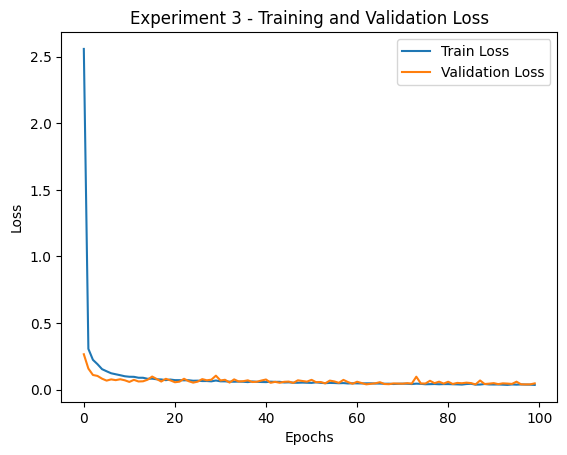

In [24]:
plt.plot(history_exp3.history['loss'], label='Train Loss')
plt.plot(history_exp3.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Experiment 3 - Training and Validation Loss')
plt.legend()
plt.show()


### 12. Evaluate your model:

In [25]:
# Predicciones en el conjunto de entrenamiento
y_pred_train_exp3 = model_exp3.predict(X_train).flatten()

# Calcular métricas en el conjunto de entrenamiento
evaluation_metrics_train_exp3 = pd.DataFrame({
    'Metric': ['MSE', 'RMSE', 'MAE', 'R²'],
    'Value (Train)': [
        mean_squared_error(y_train, y_pred_train_exp3),
        np.sqrt(mean_squared_error(y_train, y_pred_train_exp3)),
        mean_absolute_error(y_train, y_pred_train_exp3),
        r2_score(y_train, y_pred_train_exp3)
    ]
})

# Predicciones en el conjunto de prueba
y_pred_test_exp3 = model_exp3.predict(X_test).flatten()

# Calcular métricas en el conjunto de prueba
evaluation_metrics_test_exp3 = pd.DataFrame({
    'Metric': ['MSE', 'RMSE', 'MAE', 'R²'],
    'Value (Test)': [
        mean_squared_error(y_test, y_pred_test_exp3),
        np.sqrt(mean_squared_error(y_test, y_pred_test_exp3)),
        mean_absolute_error(y_test, y_pred_test_exp3),
        r2_score(y_test, y_pred_test_exp3)
    ]
})

# Combinar métricas de entrenamiento y prueba
combined_evaluation_exp3 = pd.merge(evaluation_metrics_train_exp3, evaluation_metrics_test_exp3, on='Metric')
print("Experiment 3 - Dropout Layers")
combined_evaluation_exp3


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Experiment 3 - Dropout Layers


,Metric,Value (Train),Value (Test)
0,MSE,0.039333,0.047600
1,RMSE,0.198326,0.218173
2,MAE,0.157958,0.173618
3,R²,0.953152,0.942438


### 13. Use your model to make some predictions:

In [26]:
# Tomar los primeros 10 estudiantes del conjunto de prueba
X_sample = X_test[:10]
y_sample_real = y_test[:10]

# Realizar predicciones para estos 10 estudiantes
y_sample_pred = model_exp3.predict(X_sample).flatten()

# Crear un DataFrame para comparar las etiquetas reales y las predicciones
comparison_df3 = pd.DataFrame({
    'Student Index': y_sample_real.index,
    'Real GPA': y_sample_real.values,
    'Predicted GPA': y_sample_pred
})

# Mostrar el resultado
comparison_df3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


,Student Index,Real GPA,Predicted GPA
0,1004,1.427724,1.463524
1,196,3.117354,2.783077
2,2342,2.037769,1.918385
3,1708,3.548521,3.410783
4,435,0.248977,0.475926
5,321,2.627694,2.511835
6,1472,2.057379,1.886045
7,1703,2.248338,2.261194
8,900,2.194707,2.070751
9,1057,0.758183,1.011408


## Experiment 4: Add a Batch Normalization Layer after each Dropout Layer.

### 8. Define your Deep Neural Network.

In [27]:
from tensorflow.keras.layers import BatchNormalization

model_exp4 = Sequential()
model_exp4.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model_exp4.add(Dropout(0.5))
model_exp4.add(BatchNormalization())
model_exp4.add(Dense(64, activation='relu'))
model_exp4.add(Dropout(0.5))
model_exp4.add(BatchNormalization())
model_exp4.add(Dense(64, activation='relu'))
model_exp4.add(Dropout(0.5))
model_exp4.add(BatchNormalization())
model_exp4.add(Dense(1))


c:\Users\adria\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### 9. Compile your Neural Network

In [28]:
model_exp4.compile(optimizer='adam', loss='mse', metrics=['mse'])


### 10. Fit (or train) your model

In [29]:
history_exp4 = model_exp4.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64, verbose=1)


Epoch 1/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 5.2762 - mse: 5.2762 - val_loss: 5.0290 - val_mse: 5.0290
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.9216 - mse: 3.9216 - val_loss: 3.0781 - val_mse: 3.0781
Epoch 3/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.9785 - mse: 2.9785 - val_loss: 1.8457 - val_mse: 1.8457
Epoch 4/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.3724 - mse: 2.3724 - val_loss: 1.1475 - val_mse: 1.1475
Epoch 5/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.9630 - mse: 1.9630 - val_loss: 0.7801 - val_mse: 0.7801
Epoch 6/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.3655 - mse: 1.3655 - val_loss: 0.5314 - val_mse: 0.5314
Epoch 7/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1785 - mse: 1.1785 - val_loss: 0.3269 - val_mse: 0.3269
Epoch 8/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0272 - mse: 1.0272 - val_loss: 0.2344 - val_mse: 0.2344
Epoch 9/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.95

### 11. View your history variable:

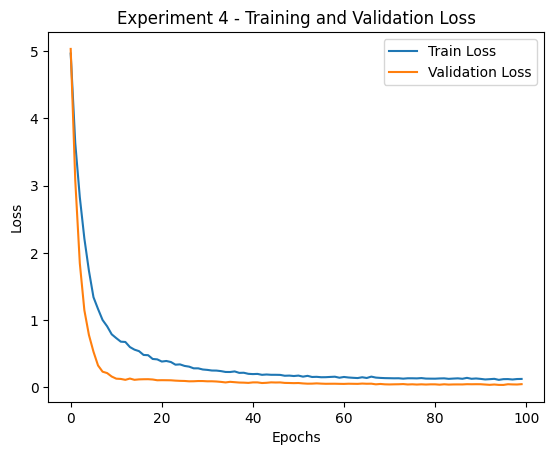

In [30]:
plt.plot(history_exp4.history['loss'], label='Train Loss')
plt.plot(history_exp4.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Experiment 4 - Training and Validation Loss')
plt.legend()
plt.show()


### 12. Evaluate your model:

In [31]:
# Predicciones en el conjunto de entrenamiento
y_pred_train_exp4 = model_exp4.predict(X_train).flatten()

# Calcular métricas en el conjunto de entrenamiento
evaluation_metrics_train_exp4 = pd.DataFrame({
    'Metric': ['MSE', 'RMSE', 'MAE', 'R²'],
    'Value (Train)': [
        mean_squared_error(y_train, y_pred_train_exp4), 
        np.sqrt(mean_squared_error(y_train, y_pred_train_exp4)), 
        mean_absolute_error(y_train, y_pred_train_exp4), 
        r2_score(y_train, y_pred_train_exp4)
    ]
})

# Calcular métricas en el conjunto de prueba
y_pred_test_exp4 = model_exp4.predict(X_test).flatten()
evaluation_metrics_test_exp4 = pd.DataFrame({
    'Metric': ['MSE', 'RMSE', 'MAE', 'R²'],
    'Value (Test)': [
        mean_squared_error(y_test, y_pred_test_exp4), 
        np.sqrt(mean_squared_error(y_test, y_pred_test_exp4)), 
        mean_absolute_error(y_test, y_pred_test_exp4), 
        r2_score(y_test, y_pred_test_exp4)
    ]
})

# Combinar las métricas de entrenamiento y prueba para comparación
combined_evaluation_exp4 = pd.merge(evaluation_metrics_train_exp4, evaluation_metrics_test_exp4, on='Metric')

combined_evaluation_exp4

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


,Metric,Value (Train),Value (Test)
0,MSE,0.048592,0.049120
1,RMSE,0.220436,0.221631
2,MAE,0.174002,0.173302
3,R²,0.942124,0.940599


### 13. Use your model to make some predictions:

In [32]:
# Tomar los primeros 10 estudiantes del conjunto de prueba
X_sample = X_test[:10]
y_sample_real = y_test[:10]

# Realizar predicciones para estos 10 estudiantes
y_sample_pred = model_exp4.predict(X_sample).flatten()

# Crear un DataFrame para comparar las etiquetas reales y las predicciones
comparison_df4 = pd.DataFrame({
    'Student Index': y_sample_real.index,
    'Real GPA': y_sample_real.values,
    'Predicted GPA': y_sample_pred
})

# Mostrar el resultado
comparison_df4

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


,Student Index,Real GPA,Predicted GPA
0,1004,1.427724,1.478950
1,196,3.117354,2.841109
2,2342,2.037769,2.022243
3,1708,3.548521,3.599497
4,435,0.248977,0.432663
5,321,2.627694,2.535208
6,1472,2.057379,1.699125
7,1703,2.248338,2.279906
8,900,2.194707,2.259926
9,1057,0.758183,1.197435


In [33]:
# Crear un DataFrame de métricas con las métricas de entrenamiento y prueba como columnas
metrics_dict = {
    'Model': [
        'Single Dense Layer',
        'Three Dense Layers',
        'Dropout Layers',
        'BatchNorm Layers'
    ],
    'MSE (Train)': [
        combined_evaluation_exp1.loc[0, 'Value (Train)'],
        combined_evaluation_exp2.loc[0, 'Value (Train)'],
        combined_evaluation_exp3.loc[0, 'Value (Train)'],
        combined_evaluation_exp4.loc[0, 'Value (Train)']
    ],
    'MSE (Test)': [
        combined_evaluation_exp1.loc[0, 'Value (Test)'],
        combined_evaluation_exp2.loc[0, 'Value (Test)'],
        combined_evaluation_exp3.loc[0, 'Value (Test)'],
        combined_evaluation_exp4.loc[0, 'Value (Test)']
    ],
    'RMSE (Train)': [
        combined_evaluation_exp1.loc[1, 'Value (Train)'],
        combined_evaluation_exp2.loc[1, 'Value (Train)'],
        combined_evaluation_exp3.loc[1, 'Value (Train)'],
        combined_evaluation_exp4.loc[1, 'Value (Train)']
    ],
    'RMSE (Test)': [
        combined_evaluation_exp1.loc[1, 'Value (Test)'],
        combined_evaluation_exp2.loc[1, 'Value (Test)'],
        combined_evaluation_exp3.loc[1, 'Value (Test)'],
        combined_evaluation_exp4.loc[1, 'Value (Test)']
    ],
    'MAE (Train)': [
        combined_evaluation_exp1.loc[2, 'Value (Train)'],
        combined_evaluation_exp2.loc[2, 'Value (Train)'],
        combined_evaluation_exp3.loc[2, 'Value (Train)'],
        combined_evaluation_exp4.loc[2, 'Value (Train)']
    ],
    'MAE (Test)': [
        combined_evaluation_exp1.loc[2, 'Value (Test)'],
        combined_evaluation_exp2.loc[2, 'Value (Test)'],
        combined_evaluation_exp3.loc[2, 'Value (Test)'],
        combined_evaluation_exp4.loc[2, 'Value (Test)']
    ],
    'R² (Train)': [
        combined_evaluation_exp1.loc[3, 'Value (Train)'],
        combined_evaluation_exp2.loc[3, 'Value (Train)'],
        combined_evaluation_exp3.loc[3, 'Value (Train)'],
        combined_evaluation_exp4.loc[3, 'Value (Train)']
    ],
    'R² (Test)': [
        combined_evaluation_exp1.loc[3, 'Value (Test)'],
        combined_evaluation_exp2.loc[3, 'Value (Test)'],
        combined_evaluation_exp3.loc[3, 'Value (Test)'],
        combined_evaluation_exp4.loc[3, 'Value (Test)']
    ]
}

# Crear el DataFrame
formatted_metrics_df = pd.DataFrame(metrics_dict)

formatted_metrics_df 



,Model,MSE (Train),MSE (Test),RMSE (Train),RMSE (Test),MAE (Train),MAE (Test),R² (Train),R² (Test)
0,Single Dense Layer,0.034185,0.040645,0.184892,0.201606,0.145616,0.159378,0.959284,0.950849
1,Three Dense Layers,0.031685,0.037435,0.178003,0.193482,0.141171,0.153845,0.962261,0.954730
2,Dropout Layers,0.039333,0.047600,0.198326,0.218173,0.157958,0.173618,0.953152,0.942438
3,BatchNorm Layers,0.048592,0.049120,0.220436,0.221631,0.174002,0.173302,0.942124,0.940599


# Reporte de Desempeño: Predicción de GPA con Redes Neuronales

## Introducción
Este reporte documenta el desempeño de cuatro arquitecturas distintas de redes neuronales diseñadas para predecir el GPA de estudiantes. Cada experimento explora configuraciones específicas de capas densas, Dropout, y Batch Normalization para evaluar su impacto en el rendimiento del modelo.

---

## Experimentos

### **1. Single Dense Layer**

**Descripción**:
- Una única capa densa con 64 neuronas.
- Función de activación: ReLU.

**Hiperparámetros**:
- **Batch size**: 32
- **Epochs**: 100
- **Optimizer**: Adam
- **Loss**: MSE

**Métricas**:
- **R² (Train)**: 0.9593
- **R² (Test)**: 0.9508
- **MSE (Test)**: 0.0406

**Análisis**:
- Este modelo simple logra un buen equilibrio entre bajo error y capacidad de generalización.
- Ideal para problemas con relaciones predominantemente lineales.

---

### **2. Three Dense Layers**

**Descripción**:
- Tres capas densas con 32 neuronas cada una.
- Función de activación: ReLU.

**Hiperparámetros**:
- **Batch size**: 64
- **Epochs**: 100
- **Optimizer**: Adam
- **Loss**: MSE

**Métricas**:
- **R² (Train)**: 0.9623
- **R² (Test)**: 0.9547
- **MSE (Test)**: 0.0374

**Análisis**:
- La adición de capas densas mejora la capacidad del modelo para capturar relaciones no lineales.
- Aunque este modelo tiene mayor capacidad, los resultados indican un balance adecuado entre sobreajuste y generalización.

---

### **3. Dropout Layers**

**Descripción**:
- Tres capas densas con 128, 128 y 64 neuronas, respectivamente.
- Se incorpora una capa **Dropout (0.05)** después de cada capa densa.

**Hiperparámetros**:
- **Batch size**: 64
- **Epochs**: 100
- **Optimizer**: Adam
- **Loss**: MSE

**Métricas**:
- **R² (Train)**: 0.9532
- **R² (Test)**: 0.9424
- **MSE (Test)**: 0.0476

**Justificación del Dropout**:
- Se utilizó **Dropout con 0.05** para evitar el sobreajuste sin sacrificar demasiada capacidad de aprendizaje.
- Un Dropout mayor podría haber llevado a una pérdida excesiva de información en cada paso de entrenamiento, lo que afectaría negativamente la capacidad predictiva.

**Análisis**:
- Este modelo maneja adecuadamente el sobreajuste, pero presenta un leve decremento en el rendimiento comparado con configuraciones más simples.
- Adecuado para escenarios donde se requiere mayor robustez frente a datos ruidosos.

---

### **4. BatchNorm Layers**

**Descripción**:
- Tres capas densas con 64 neuronas cada una.
- Después de cada capa densa, se incorpora una capa **Batch Normalization** seguida de **Dropout (0.05)**.

**Hiperparámetros**:
- **Batch size**: 64
- **Epochs**: 100
- **Optimizer**: Adam
- **Loss**: MSE

**Métricas**:
- **R² (Train)**: 0.9421
- **R² (Test)**: 0.9406
- **MSE (Test)**: 0.0491

**Análisis**:
- La combinación de **Batch Normalization** con Dropout estabiliza el proceso de entrenamiento y mejora la convergencia.
- Aunque el rendimiento es ligeramente inferior al de las arquitecturas más simples, este modelo es útil para datos con características no normalizadas o distribuciones complejas.

---

## Comparación de Modelos

| Model                  | MSE (Train) | MSE (Test) | RMSE (Train) | RMSE (Test) | MAE (Train) | MAE (Test) | R² (Train) | R² (Test) |
|------------------------|-------------|------------|--------------|-------------|-------------|------------|------------|-----------|
| Single Dense Layer     | 0.0342      | 0.0406     | 0.1849       | 0.2016      | 0.1456      | 0.1594     | 0.9593     | 0.9508    |
| Three Dense Layers     | 0.0317      | 0.0374     | 0.1780       | 0.1935      | 0.1412      | 0.1538     | 0.9623     | 0.9547    |
| Dropout Layers         | 0.0399      | 0.0476     | 0.1983       | 0.2182      | 0.1580      | 0.1736     | 0.9532     | 0.9424    |
| BatchNorm Layers       | 0.0486      | 0.0491     | 0.2204       | 0.2216      | 0.1740      | 0.1733     | 0.9421     | 0.9406    |

---

## Conclusiones
- **Single Dense Layer** ofrece un excelente desempeño con una arquitectura simple, ideal para relaciones lineales y ligeramente no lineales.
- **Three Dense Layers** logra la mejor capacidad predictiva, aprovechando relaciones más complejas.
- **Dropout Layers** y **BatchNorm Layers** son opciones más robustas para datos ruidosos, aunque con un ligero sacrificio en precisión.

## Recomendaciones
- Se recomienda **Three Dense Layers** para maximizar la precisión en entornos con datos limpios.
- **Dropout Layers** o **BatchNorm Layers** son más adecuadas en escenarios con mayor variabilidad o ruido en los datos.


